# Model to estimate the price of used cars - Part 1

In this notebook a model will be developed to estimate the price of used cars, based on the proposal of the edX course "IBM: DA0101EN - Analizing Data With Python"
The model will is only for academic pourpose only and it will use the data provided by the course.

## Dependencies needed for this model

* pandas
* numpy
* matplotlib

___
___
# Starting

## Libraries

Firstly, it's needed to import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

## Settings
Some settings that will help with formatting

In [2]:
# Force to show all DataFrame columns
pd.options.display.max_columns = None

 ___
 ## Data gattering
    
    Then, the data is gattered from an online host, the data is in .csv format so the pandas.read_csv(file) method will be used to save the data as a pandas DataFrame

In [3]:
# Data URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

# Getting the data, .csv files use the first row as the headers row, but since the dataframe doesn't have a headers row, 
#  it must be expressed that the data doesn't have any headers
df = pd.read_csv(url,header=None)


In [4]:
# Since we used the 'None' value as a header, the dataframe columns atribute is just a list of numbers
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25],
           dtype='int64')

In [5]:
# This can be fixed by changing it with a Python list

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

print('Headers: ')

df.columns = headers
print(df.columns)

print('\n\nDataFrame\'s Head:')
df.head()

Headers: 
Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


DataFrame's Head:


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


___

# Data cleaning

After getting the data, there could be some missing or wrong values in it, so it must be checked if there is any of those. Also it's important to check the data types, since sometimes numeric data could be interpreted as text instead of numbers

In the data provided in this example, there are missing values shown as shown as _"?"_, so the df.replace() method could be used to change those values to np.nan (the ones that pandas does interpret as an empty/null value)

* Normalize missing values
* Check the data type (correct if needed)
* Checking how much data is missing
* Take decitions on what to do with the missing data:
    * Droping the items with missing values
    * Using the mean value
    * Using the most frequent value
    * Other, more complex, function

#### Normalizing missing values and fixing datatypes

In [6]:
# Replacing the '?' values with NaN
df.replace('?',np.nan, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
# Sometimes the data is interpreted as the wrong data type (text instead of number, for example), so it's needed to check that too
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [8]:
# Since the price, stroke, bore and peak-rpm values should be float numbers, it's needed to change them to float
df[['price','stroke','bore','peak-rpm']] = df[['price','stroke','bore','peak-rpm']].astype('float')

# Also normalized-losses should be int, but since there are NaN values (wich are "float"), it will also be redefined as float, but changed later
df['normalized-losses'] = df['normalized-losses'].astype('float')

df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

#### Checking the missing data

In [9]:
# Checking how many missing data is there
has_missing_data = set()
missing_data = df.isnull() # This makes a DataFrame of Trues and Falses depending if the data is missing or not
for column in missing_data:
    
    missing_count=0
    total=0
    
    for missing in missing_data[column]:
        if missing:
            has_missing_data.add(column)
            missing_count+=1
    print(f'{column.title():<18}: {missing_count:>1}')   

Symboling         : 0
Normalized-Losses : 41
Make              : 0
Fuel-Type         : 0
Aspiration        : 0
Num-Of-Doors      : 2
Body-Style        : 0
Drive-Wheels      : 0
Engine-Location   : 0
Wheel-Base        : 0
Length            : 0
Width             : 0
Height            : 0
Curb-Weight       : 0
Engine-Type       : 0
Num-Of-Cylinders  : 0
Engine-Size       : 0
Fuel-System       : 0
Bore              : 4
Stroke            : 4
Compression-Ratio : 0
Horsepower        : 2
Peak-Rpm          : 2
City-Mpg          : 0
Highway-Mpg       : 0
Price             : 4


#### Describing the columns with missing data

In [10]:
df[has_missing_data].describe(include='all')

,bore,horsepower,stroke,price,normalized-losses,peak-rpm,num-of-doors
count,201.000000,203,201.000000,201.000000,164.000000,203.000000,203
unique,NaN,59,NaN,NaN,NaN,NaN,2
top,NaN,68,NaN,NaN,NaN,NaN,four
freq,NaN,19,NaN,NaN,NaN,NaN,114
mean,3.329751,NaN,3.255423,13207.129353,122.000000,5125.369458,NaN
std,0.273539,NaN,0.316717,7947.066342,35.442168,479.334560,NaN
min,2.540000,NaN,2.070000,5118.000000,65.000000,4150.000000,NaN
25%,3.150000,NaN,3.110000,7775.000000,94.000000,4800.000000,NaN
50%,3.310000,NaN,3.290000,10295.000000,115.000000,5200.000000,NaN
75%,3.590000,NaN,3.410000,16500.000000,150.000000,5500.000000,NaN


/home/ruther/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ruther/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


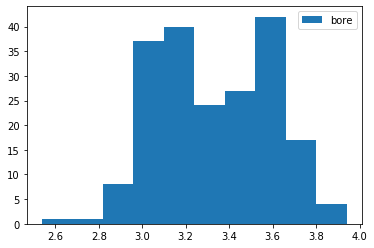

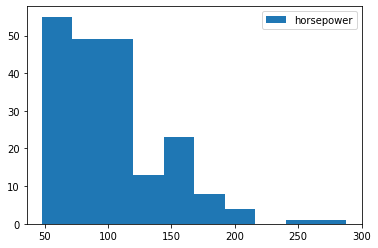

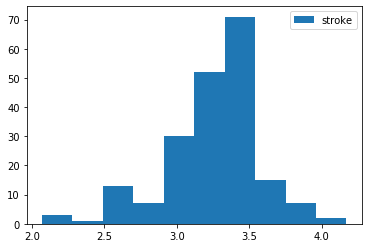

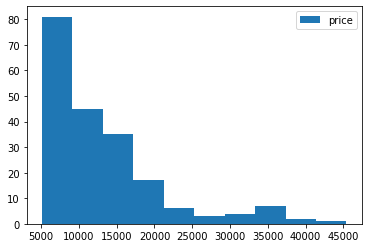

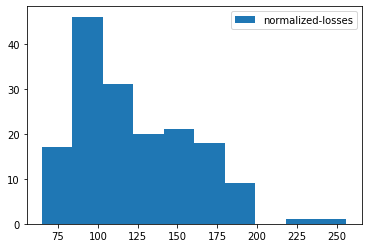

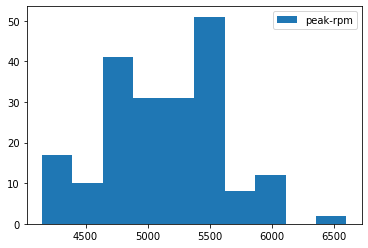

num-of-doors couldn't be graphed


In [11]:
# Graphing the columns that have missing data

for column in has_missing_data:    
    try:
        plt.hist(df[column].astype(np.double), label=column)
        plt.legend()
        plt.show()
    except:
        print(f'{column} couldn\'t be graphed')

### Analysis per-attribute of the missing data, and ways to deal with it

A small analysis will be done with each attribute that containts missing data, and different ways of dealing with it will be threated

In [12]:
# Normalized losses is the attribute with more missing data, since the distribution is pretty broad random numbers between 75 and 175 will be inserted in the missing values
# For the random numbers first a numpy array is made between both limits, then one is chosen inside the 
attribute = 'normalized-losses'
values = np.linspace(75,175,175-75)

for i, item in enumerate(df[attribute]):
    if np.isnan(item):
        df.at[i,attribute] = int(np.random.choice(values))

In [13]:
attribute = 'num-of-doors'

print(df[attribute].isna().value_counts(),end='\n\n')
print(df[attribute].value_counts(normalize=True), end='\n\n')

# Since there are only two missing values, and there isn't a clear predominant one, the items with missing values are gonna be dropped

df.dropna(subset=['num-of-doors'], axis=0, inplace=True)

print(df[attribute].isna().value_counts(),end='\n\n')
print(df[attribute].value_counts(normalize=True), end='\n\n')

False    203
True       2
Name: num-of-doors, dtype: int64

four    0.561576
two     0.438424
Name: num-of-doors, dtype: float64

False    203
Name: num-of-doors, dtype: int64

four    0.561576
two     0.438424
Name: num-of-doors, dtype: float64



In [14]:
attribute = 'bore'

print(df[attribute].isna().value_counts(),end='\n\n')

print(f'Porcentual STD Dev: {df[attribute].std()/df[attribute].mean()*100}')

# Since the STD Dev is less than 10% I'll use the mean value to replace the missing ones

df[attribute].replace(np.nan, df[attribute].mean(), inplace=True)

False    199
True       4
Name: bore, dtype: int64

Porcentual STD Dev: 8.227493860380608


In [15]:
attribute = 'stroke'

print(df[attribute].isna().value_counts(),end='\n\n')

print(f'Porcentual STD Dev: {df[attribute].std()/df[attribute].mean()*100}')

# Same criteria as before

df[attribute].replace(np.nan, df[attribute].mean(), inplace=True)

False    199
True       4
Name: stroke, dtype: int64

Porcentual STD Dev: 9.773072025415132


False    201
True       2
Name: horsepower, dtype: int64

count     201
unique     58
top        68
freq       19
Name: horsepower, dtype: object


count     203
unique     58
top        68
freq       21
Name: horsepower, dtype: object

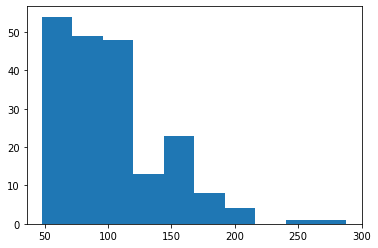

In [16]:
attribute = 'horsepower'

print(df[attribute].isna().value_counts(),end='\n\n')
print(df[attribute].describe(include=all))
plt.hist(df[attribute].astype('float'))

# Since w/e

df[attribute].replace(np.nan,df[attribute].value_counts().idxmax(), inplace=True)
df[attribute].describe()

In [17]:
attribute = 'peak-rpm'

print(df[attribute].isna().value_counts(),end='\n\n')
print(df[attribute].describe(include=all),end='\n\n')
print(f'The Std Dev is: {df[attribute].std()/df[attribute].mean()}')

# Since the Std Dev is less than 10% the values are gonna be replaced with the mean value

df[attribute].replace(np.nan,df[attribute].mean(), inplace=True)

print(df[attribute].isna().value_counts(),end='\n\n')

False    201
True       2
Name: peak-rpm, dtype: int64

count     201.000000
mean     5125.870647
std       479.820136
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak-rpm, dtype: float64

The Std Dev is: 0.0936075389626179
False    203
Name: peak-rpm, dtype: int64



In [18]:
# Counting how many items are missing the 'price' value and, since that is the objective function todescribe, those values are gonna be droped
attribute='price'
df.dropna(subset=[attribute], axis=0, inplace=True)

Checking again the dataframe

In [19]:
has_missing_data = set()
missing_data = df.isnull() # This makes a DataFrame of Trues and Falses depending if the data is missing or not
for column in missing_data:
    
    missing_count=0
    total=0
    
    for missing in missing_data[column]:
        if missing:
            has_missing_data.add(column)
            missing_count+=1
    print(f'{column.title():<18}: {missing_count:>1}')

Symboling         : 0
Normalized-Losses : 0
Make              : 0
Fuel-Type         : 0
Aspiration        : 0
Num-Of-Doors      : 0
Body-Style        : 0
Drive-Wheels      : 0
Engine-Location   : 0
Wheel-Base        : 0
Length            : 0
Width             : 0
Height            : 0
Curb-Weight       : 0
Engine-Type       : 0
Num-Of-Cylinders  : 0
Engine-Size       : 0
Fuel-System       : 0
Bore              : 0
Stroke            : 0
Compression-Ratio : 0
Horsepower        : 0
Peak-Rpm          : 0
City-Mpg          : 0
Highway-Mpg       : 0
Price             : 0


In [20]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,138.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,108.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,121.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


___

Now the DataFrame is clean and ready to be used!

It will be saved as a csv file to be used later already cleaned

In [22]:
df.to_csv('clean-data.csv', index=False)

## Final Notes

* Data was:
    * Imported from the web
    * Analized and processed to be able for future analysis

  

* To-Do:
    - [ ] Some of the things made here could be set into functions to diminish the aumount of lines of code, and also to ease the functionality on future models
 